In [4]:
import pandas as pd 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 



In [5]:
# loading the data
file_path = r'D:\This PC\Documents\Data_Analysis\HUJI_course\projects_and_datasets\final_project\coffee_shop_sales_data\coffee_shop_sales.csv'
df = pd.read_csv(file_path)



# date & and time type convertion
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time 

# creating the revenue column
df['revenue'] = df['transaction_qty'] * df['unit_price']

# general inspection:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  revenue           149116 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 13.7+ MB


In [7]:
# cheking if there are any missing data (Nulls)
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
revenue             0
dtype: int64

In [8]:
# checking for duplicate rows: 
print(f" number of duplicate rows: {df['transaction_id'].duplicated().sum()}")

 number of duplicate rows: 0


# quantity, prices and revenue: 

In [9]:
df[['transaction_qty', 'unit_price', 'revenue']].describe()

,transaction_qty,unit_price,revenue
count,149116.000000,149116.000000,149116.000000
mean,1.438276,3.382219,4.686367
std,0.542509,2.658723,4.227099
min,1.000000,0.800000,0.800000
25%,1.000000,2.500000,3.000000
50%,1.000000,3.000000,3.750000
75%,2.000000,3.750000,6.000000
max,8.000000,45.000000,360.000000


In [10]:
# checking if transaction quantity and unit price are ever 0 or negative: 
df.query('transaction_qty <= 0 or unit_price <= 0')[['transaction_id', 'unit_price']]

,transaction_id,unit_price


In [11]:
# checking which product is the one with max price 
df.query('unit_price == 45')[['product_id','product_category']]

,product_id,product_category
5187,8,Coffee beans
5879,8,Coffee beans
5944,8,Coffee beans
7626,8,Coffee beans
8452,8,Coffee beans
...,...,...
144743,8,Coffee beans
145411,8,Coffee beans
148573,8,Coffee beans
148702,8,Coffee beans


# date and time

In [12]:
# sampling the date and time columns:
df[['transaction_date', 'transaction_time']].head(5) 

,transaction_date,transaction_time
0,2023-01-01,07:06:11
1,2023-01-01,07:08:56
2,2023-01-01,07:14:04
3,2023-01-01,07:20:24
4,2023-01-01,07:22:41


In [13]:
print(f"Earlies transaction time: {df['transaction_time'].min()}")
print(f"Latest transaxtion time: {df['transaction_time'].max()}")
      

Earlies transaction time: 06:00:00
Latest transaxtion time: 20:59:32


In [14]:
# creating a time range column with 1 hour intervals: 
hours = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour 

df['time_range'] = (
    hours.astype(str) + ' - ' + (hours + 1).astype(str) 
) 


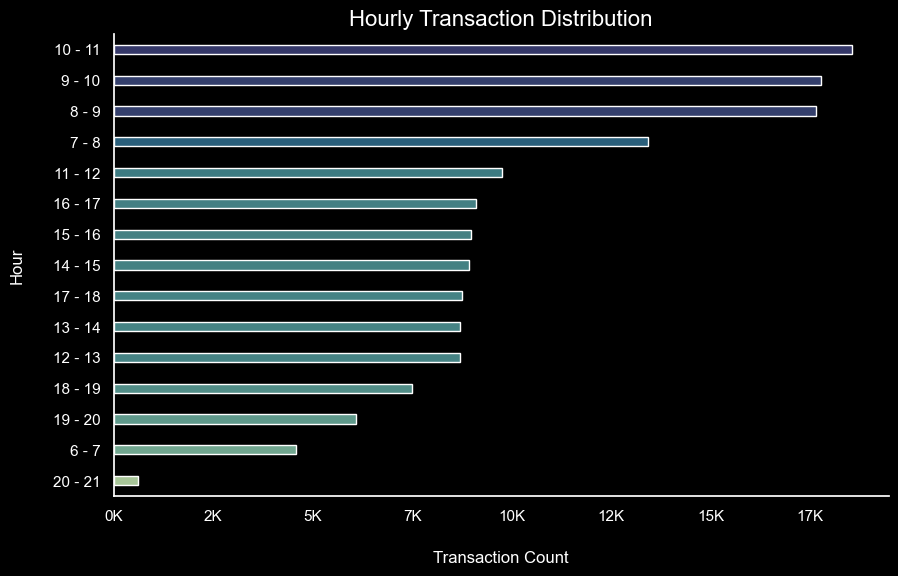

In [15]:
tran_per_hour = df['time_range'].value_counts().sort_values(ascending=False).to_frame()

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= tran_per_hour, x='count', y='time_range', hue='count', palette='crest', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.title('Hourly Transaction Distribution', fontsize= 16, color='white')
plt.xlabel('Transaction Count', fontsize=12, color='white', labelpad=20)
plt.ylabel('Hour', fontsize=12, color='white', labelpad=20)

plt.show()


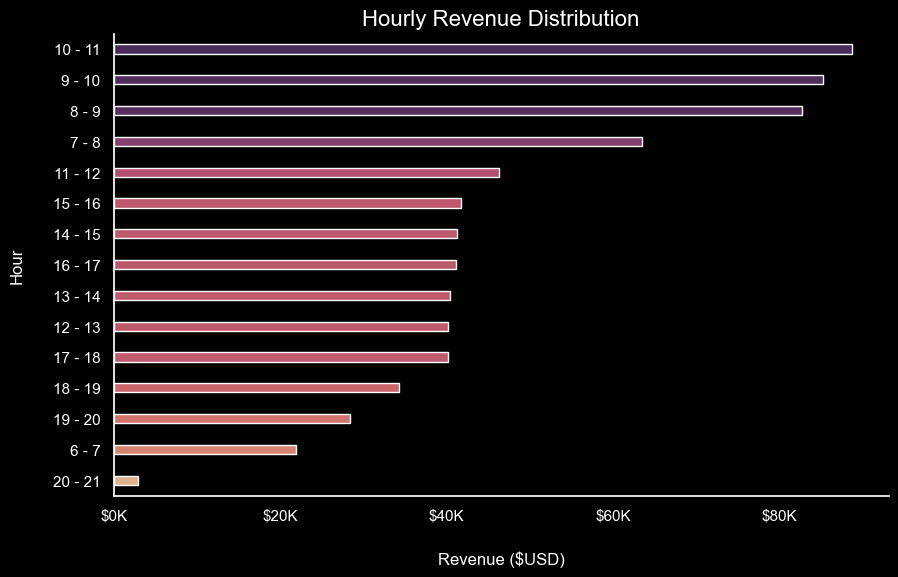

In [16]:
revenue_per_hour = df.groupby('time_range')['revenue'].sum().to_frame().sort_values(by='revenue', ascending=False)

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= revenue_per_hour, x='revenue', y='time_range', hue='revenue', palette='flare', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Hourly Revenue Distribution', fontsize= 16, color='white')
plt.xlabel('Revenue ($USD)', fontsize=12, color='white', labelpad=20)
plt.ylabel('Hour', fontsize=12, color='white', labelpad=20)

plt.show()


In [17]:
# checking the time report range of the data 
print(f"first day of the report period: {df['transaction_date'].min()}")
print(f"last day of the report period: {df['transaction_date'].max()}")
      


first day of the report period: 2023-01-01 00:00:00
last day of the report period: 2023-06-30 00:00:00


In [18]:
# total revenue per month

df['transaction_month'] = df['transaction_date'].dt.strftime('%b')
df['month_numeric'] = df['transaction_date'].dt.month

monthly_revenue = df.groupby(['transaction_month', 'month_numeric'])['revenue'].sum().reset_index()

# fixing the index 
monthly_revenue = monthly_revenue.sort_values(by='month_numeric')
monthly_revenue.set_index(keys='month_numeric', drop=True, inplace=True)

monthly_revenue

,transaction_month,revenue
month_numeric,,
1,Jan,81677.74
2,Feb,76145.19
3,Mar,98834.68
4,Apr,118941.08
5,May,156727.76
6,Jun,166485.88


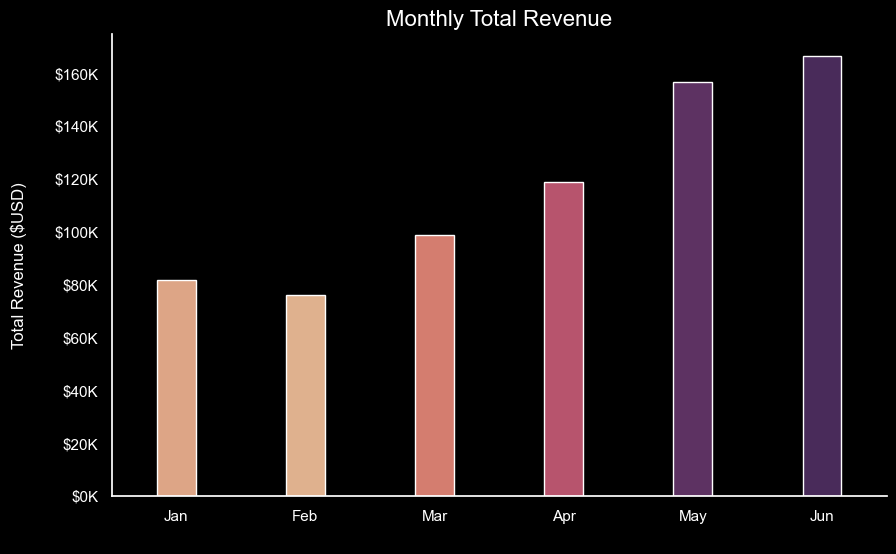

In [19]:
# plotting revenue per month

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= monthly_revenue, x='transaction_month', y='revenue', hue='revenue', palette='flare', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')


plt.title('Monthly Total Revenue', fontsize= 16, color='white')
plt.ylabel('Total Revenue ($USD)', fontsize=12, color='white', labelpad=20)
plt.xlabel(' ')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.show()

In [20]:
# transactions per month 
monthly_transactions = df[['transaction_month', 'month_numeric']].value_counts().reset_index() 

# fixing the index
monthly_transactions = monthly_transactions.sort_values(by='month_numeric')

monthly_transactions.set_index(keys='month_numeric', drop=True, inplace=True)

monthly_transactions




,transaction_month,count
month_numeric,,
1,Jan,17314
2,Feb,16359
3,Mar,21229
4,Apr,25335
5,May,33527
6,Jun,35352


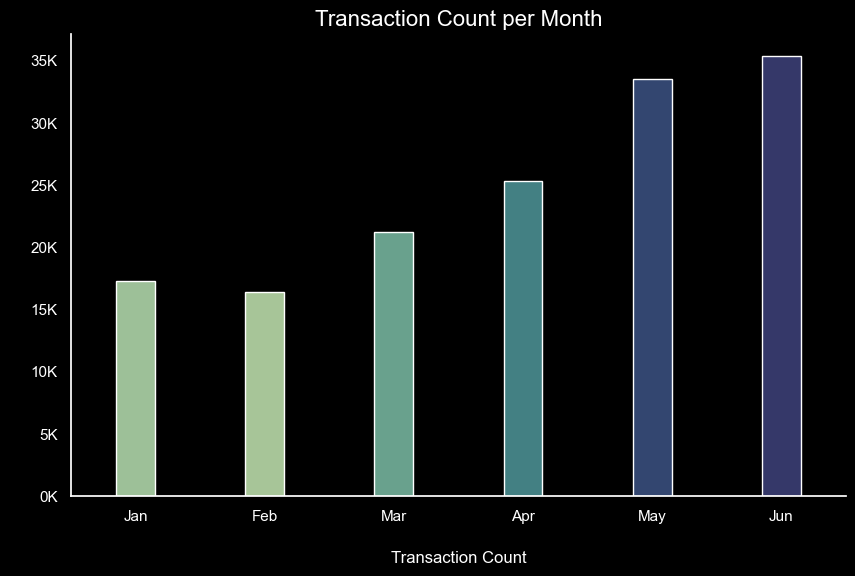

In [21]:
# plotting the transactions per month 

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= monthly_transactions, x='transaction_month', y='count', hue='count', palette='crest', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K'))

plt.title('Transaction Count per Month', fontsize= 16, color='white')
plt.xlabel('Transaction Count', fontsize=12, color='white', labelpad=20)
plt.ylabel(' ')

plt.show()

In [22]:
# extracting the weekday name 
df['day_name'] = df['transaction_date']. dt.strftime('%a')
df['is_weekend'] = df['day_name'].apply(lambda d: True if d in ['Sat', 'Sun'] else False)
df['day_numeric'] = df['transaction_date'].dt.dayofweek
df[['day_name', 'is_weekend', 'day_numeric']]

,day_name,is_weekend,day_numeric
0,Sun,True,6
1,Sun,True,6
2,Sun,True,6
3,Sun,True,6
4,Sun,True,6
...,...,...,...
149111,Fri,False,4
149112,Fri,False,4
149113,Fri,False,4
149114,Fri,False,4


In [23]:
# finding the transactions per day:

transaction_per_day = df[['day_name', 'day_numeric']].value_counts().reset_index()


# fixing the indexing to fix the dayts assortment
transaction_per_day = transaction_per_day.sort_values('day_numeric')
transaction_per_day.set_index(keys='day_numeric', drop=True, inplace=True )

transaction_per_day

,day_name,count
day_numeric,,
0,Mon,21643
1,Tue,21202
2,Wed,21310
3,Thu,21654
4,Fri,21701
5,Sat,20510
6,Sun,21096


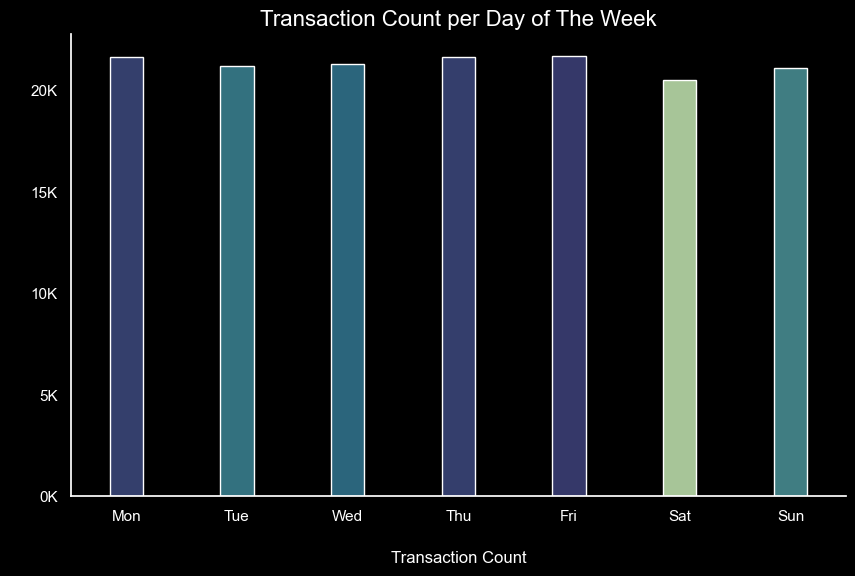

In [24]:
# plotting transaction per day:

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= transaction_per_day, x='day_name', y='count', hue='count', palette='crest', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K'))

plt.title('Transaction Count per Day of The Week', fontsize= 16, color='white')
plt.xlabel('Transaction Count', fontsize=12, color='white', labelpad=20)
plt.ylabel(' ')

plt.show()

In [25]:
# revenue per day

revenue_per_day = df.groupby(['day_numeric', 'day_name'])['revenue'].sum ().reset_index()
revenue_per_day.set_index(keys='day_numeric', drop=True, inplace=True) 
revenue_per_day

,day_name,revenue
day_numeric,,
0,Mon,101677.28
1,Tue,99455.94
2,Wed,100313.54
3,Thu,100767.78
4,Fri,101373.00
5,Sat,96894.48
6,Sun,98330.31


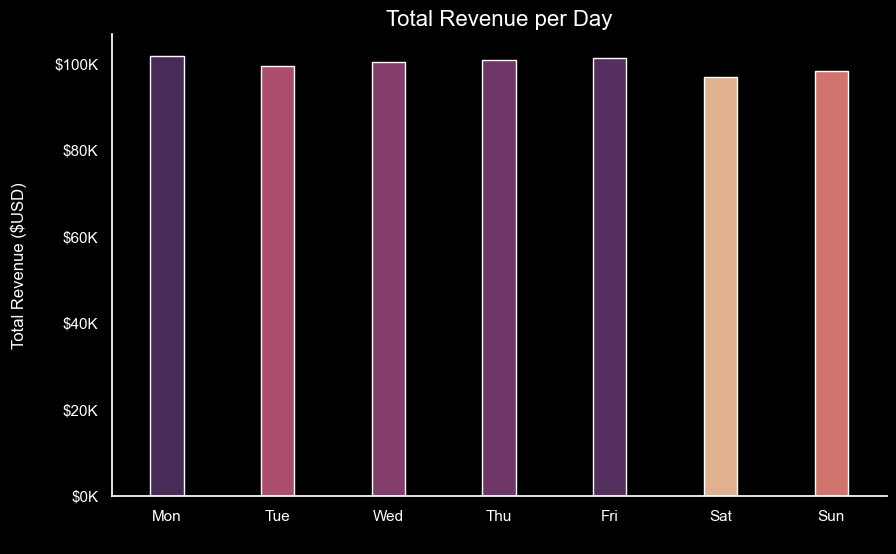

In [26]:
# plotting revenue per day 

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= revenue_per_day, x='day_name', y='revenue', hue='revenue', palette='flare', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')


plt.title('Total Revenue per Day', fontsize= 16, color='white')
plt.ylabel('Total Revenue ($USD)', fontsize=12, color='white', labelpad=20)
plt.xlabel(' ')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.show()

# products and categories

In [27]:
# checking the unique product categories we have: 
print(f"number of unique product categories: {df['product_category'].nunique()}")
print(df['product_category'].unique())

number of unique product categories: 9
['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']


In [28]:
df.groupby('product_category')['transaction_qty'].sum()


product_category
Bakery                23214
Branded                 776
Coffee                89250
Coffee beans           1828
Drinking Chocolate    17457
Flavours              10511
Loose Tea              1210
Packaged Chocolate      487
Tea                   69737
Name: transaction_qty, dtype: int64

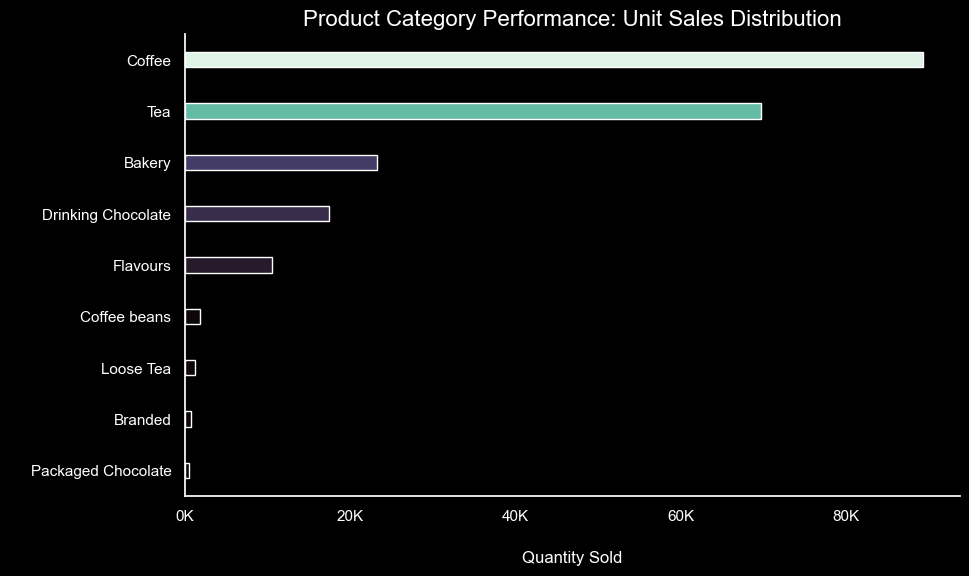

In [29]:
products_unit_volume = df.groupby('product_category')['transaction_qty'].sum().reset_index().sort_values(by= 'transaction_qty', ascending=False)

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= products_unit_volume, x='transaction_qty', y='product_category', hue='transaction_qty', palette='mako', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.title('Product Category Performance: Unit Sales Distribution', fontsize= 16, color='white')
plt.xlabel('Quantity Sold', fontsize=12, color='white', labelpad=20)
plt.ylabel(' ')

plt.show()

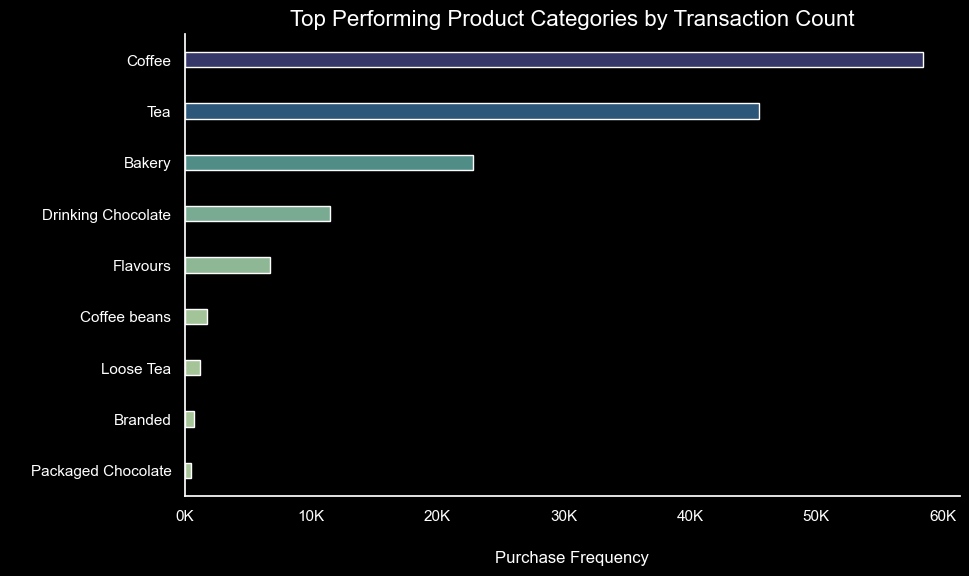

In [30]:
products_transaction_frequency = df['product_category'].value_counts().reset_index().sort_values(by= 'count', ascending=False)

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= products_transaction_frequency, x='count', y='product_category', hue='count', palette='crest', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.title('Top Performing Product Categories by Transaction Count', fontsize= 16, color='white')
plt.xlabel('Purchase Frequency', fontsize=12, color='white', labelpad=20)
plt.ylabel(' ')

plt.show()

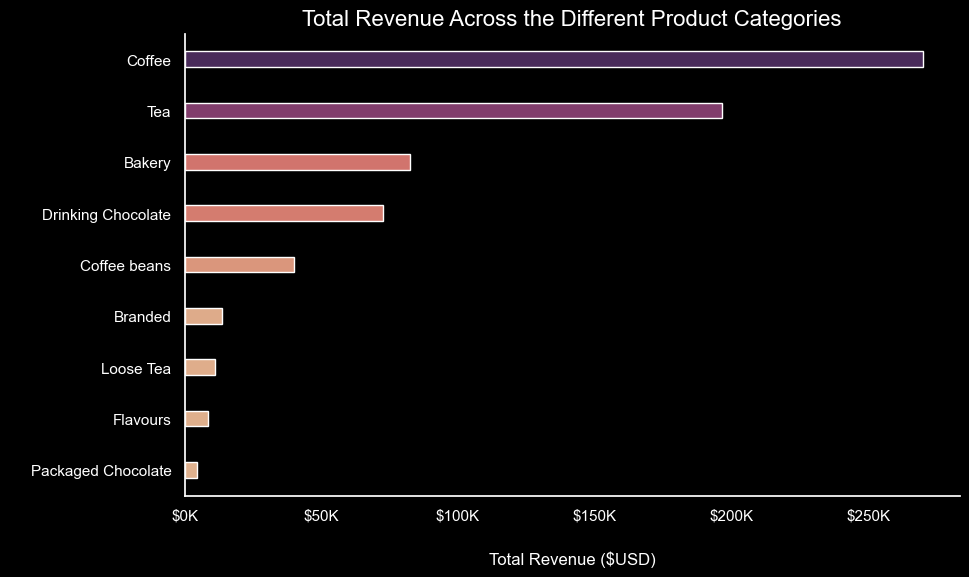

In [31]:
products_revenue_plot = df.groupby('product_category')['revenue'].sum().reset_index().sort_values(by= 'revenue', ascending=False)

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= products_revenue_plot, x='revenue', y='product_category', hue='revenue', palette='flare', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')


plt.title('Total Revenue Across the Different Product Categories', fontsize= 16, color='white')
plt.xlabel('Total Revenue ($USD)', fontsize=12, color='white', labelpad=20)
plt.ylabel(' ')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()

In [32]:
# plotting unit volume per product type 

unit_volume_product_type = df.groupby('product_type')['transaction_qty'].sum().reset_index() 
top_10_products_volume = unit_volume_product_type.sort_values(by='transaction_qty', ascending=False).head(10) 

top_10_products_volume

,product_type,transaction_qty
4,Brewed Chai tea,26250
13,Gourmet brewed coffee,25973
0,Barista Espresso,24943
3,Brewed Black tea,17462
17,Hot chocolate,17457
6,Brewed herbal tea,17328
22,Organic brewed coffee,13012
10,Drip coffee,12891
25,Premium brewed coffee,12431
27,Scone,10465


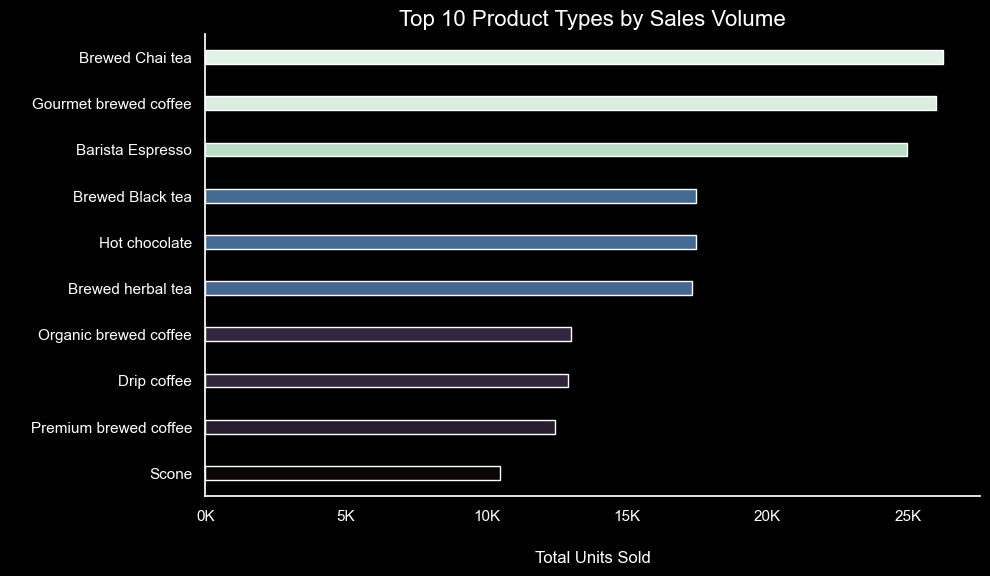

In [33]:
# plotting top 10 sellers : 

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= top_10_products_volume, x='transaction_qty', y='product_type', hue='transaction_qty', palette='mako', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.title('Top 10 Product Types by Sales Volume', fontsize= 16, color='white')
plt.xlabel('Total Units Sold', fontsize=12, color='white', labelpad=20)
plt.ylabel(' ')

plt.show()

In [34]:
# transaction frequency per product type 

transaction_frequency_product_type = df['product_type'].value_counts().reset_index()
top_10_frequency_items = transaction_frequency_product_type.sort_values(by='count', ascending=False).head(10) 

top_10_frequency_items

,product_type,count
0,Brewed Chai tea,17183
1,Gourmet brewed coffee,16912
2,Barista Espresso,16403
3,Hot chocolate,11468
4,Brewed Black tea,11350
5,Brewed herbal tea,11245
6,Scone,10173
7,Organic brewed coffee,8489
8,Drip coffee,8477
9,Premium brewed coffee,8135


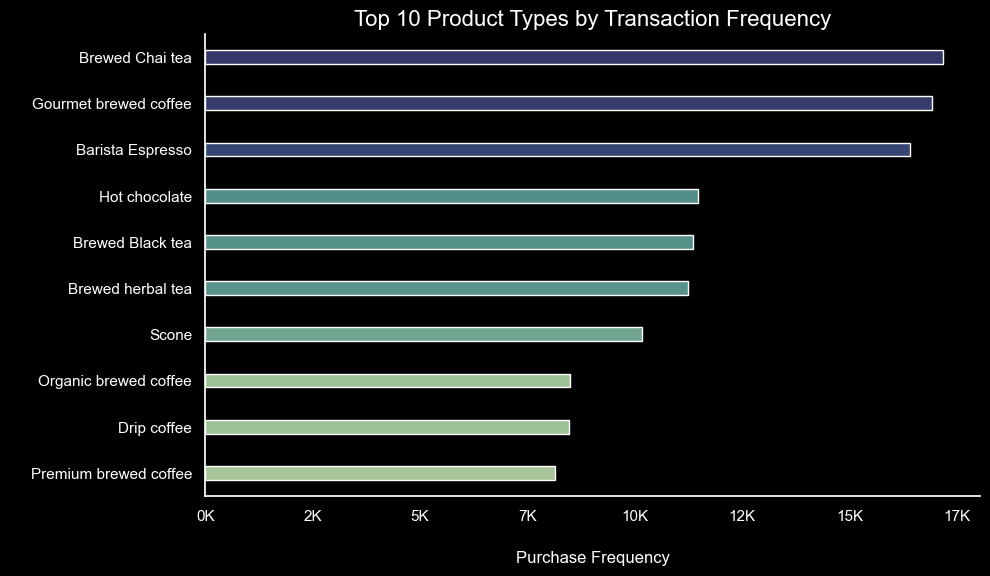

In [35]:
#plotting: 

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= top_10_frequency_items, x='count', y='product_type', hue='count', palette='crest', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.title('Top 10 Product Types by Transaction Frequency', fontsize= 16, color='white')
plt.xlabel('Purchase Frequency', fontsize=12, color='white', labelpad=20)
plt.ylabel(' ')

plt.show()

In [36]:
# revenue per product 
revenue_per_products = df.groupby('product_type')['revenue'].sum().reset_index()
top_10_revenue_products = revenue_per_products.sort_values(by='revenue', ascending=False).head(10)

top_10_revenue_products

,product_type,revenue
0,Barista Espresso,91406.20
4,Brewed Chai tea,77081.95
17,Hot chocolate,72416.00
13,Gourmet brewed coffee,70034.60
3,Brewed Black tea,47932.00
6,Brewed herbal tea,47539.50
25,Premium brewed coffee,38781.15
22,Organic brewed coffee,37746.50
27,Scone,36866.12
10,Drip coffee,31984.00


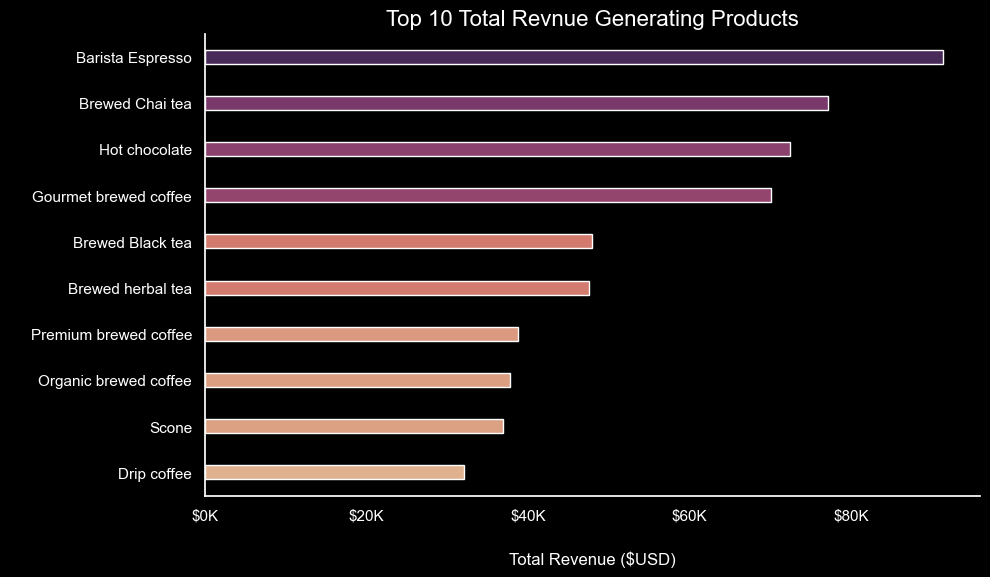

In [37]:
# plotting top 10 products that drive revenue 

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= top_10_revenue_products, x='revenue', y='product_type', hue='revenue', palette='flare', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')


plt.title('Top 10 Total Revnue Generating Products', fontsize= 16, color='white')
plt.xlabel('Total Revenue ($USD)', fontsize=12, color='white', labelpad=20)
plt.ylabel(' ')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()


In [43]:
# the top 10 products in terms of pricing 

prices_table = df[['product_id', 'product_detail', 'unit_price']].drop_duplicates().sort_values(by='unit_price', ascending=False)

prices_table.head(10)

,product_id,product_detail,unit_price
5187,8,Civet Cat,45.00
4604,81,I Need My Bean! T-shirt,28.00
3301,9,Organic Decaf Blend,28.00
42973,81,I Need My Bean! T-shirt,23.00
16522,9,Organic Decaf Blend,23.00
11675,82,I Need My Bean! Diner mug,23.00
7721,83,I Need My Bean! Latte cup,23.00
3921,9,Organic Decaf Blend,22.50
3298,6,Ethiopia,21.00
3559,4,Primo Espresso Roast,20.45


In [2]:
#  the top 10 items in temrs of unit voulme sales 

items_sales_volume = df.groupby('product_detail')['transaction_qty'].sum().reset_index()

items_sales_volume_top_10 = items_sales_volume.sort_values(by='transaction_qty', ascending=False)

items_sales_volume_top_10

NameError: name 'df' is not defined

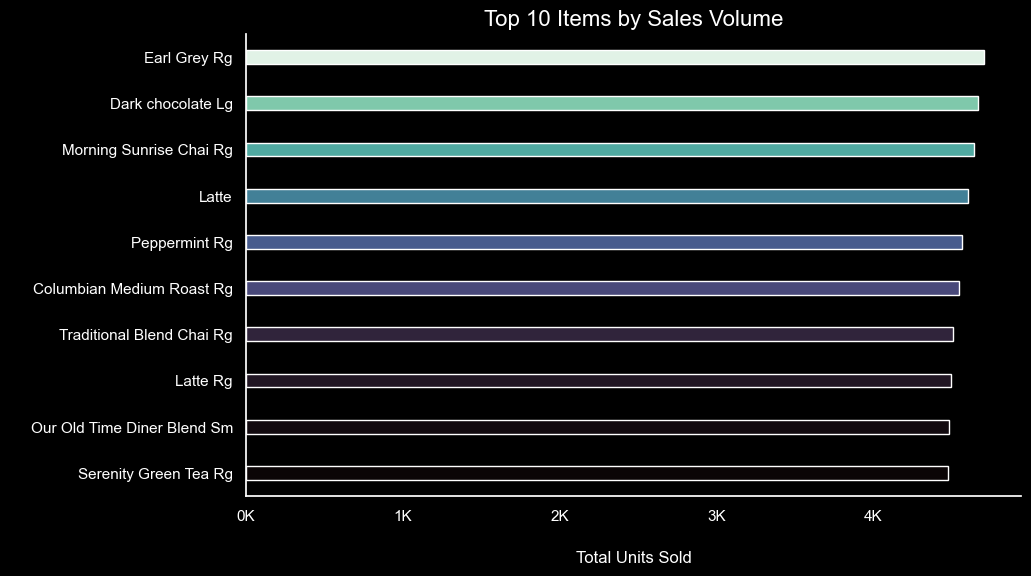

In [145]:
# plotting the top 10 sellers item: 

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= items_sales_volume_top_10, x='transaction_qty', y='product_detail', hue='transaction_qty', palette='mako', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.title('Top 10 Items by Sales Volume', fontsize= 16, color='white')
plt.xlabel('Total Units Sold', fontsize=12, color='white', labelpad=20)
plt.ylabel(' ')

plt.show()

In [ ]:
#  the top 10 items in temrs of transaction frequency  

items_sales_frequency = df['product_detail'].value_counts().reset_index()

items_sales_frequency_top_10 = items_sales_frequency.sort_values(by='count', ascending=False).head(10)

items_sales_frequency_top_10

,product_detail,count
0,Chocolate Croissant,3076
1,Earl Grey Rg,3053
2,Dark chocolate Lg,3029
3,Morning Sunrise Chai Rg,3026
4,Columbian Medium Roast Rg,3013
5,Latte,2990
6,Sustainably Grown Organic Lg,2961
7,Traditional Blend Chai Rg,2955
8,Spicy Eye Opener Chai Lg,2951
9,Peppermint Rg,2949


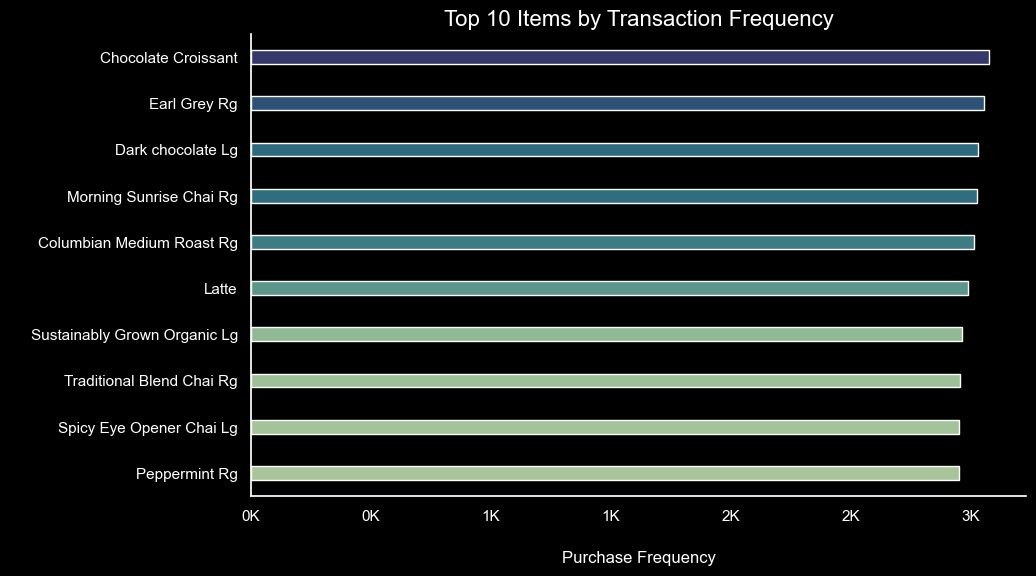

In [148]:
# plotting 

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= items_sales_frequency_top_10, x='count', y='product_detail', hue='count', palette='crest', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.title('Top 10 Items by Transaction Frequency', fontsize= 16, color='white')
plt.xlabel('Purchase Frequency', fontsize=12, color='white', labelpad=20)
plt.ylabel(' ')

plt.show()

In [149]:
# the top 10 items in terms of revenue 

items_total_revenue = df.groupby('product_detail')['revenue'].sum().reset_index()

items_total_revenue_top_10 = items_total_revenue.sort_values(by='revenue', ascending=False).head(10)

items_total_revenue_top_10

,product_detail,revenue
75,Sustainably Grown Organic Lg,21151.75
20,Dark chocolate Lg,21006.00
48,Latte Rg,19112.25
6,Cappuccino Lg,17641.75
53,Morning Sunrise Chai Lg,17384.00
47,Latte,17257.50
43,Jamaican Coffee River Lg,16481.25
76,Sustainably Grown Organic Rg,16233.75
5,Cappuccino,15997.50
2,Brazilian Lg,15109.50


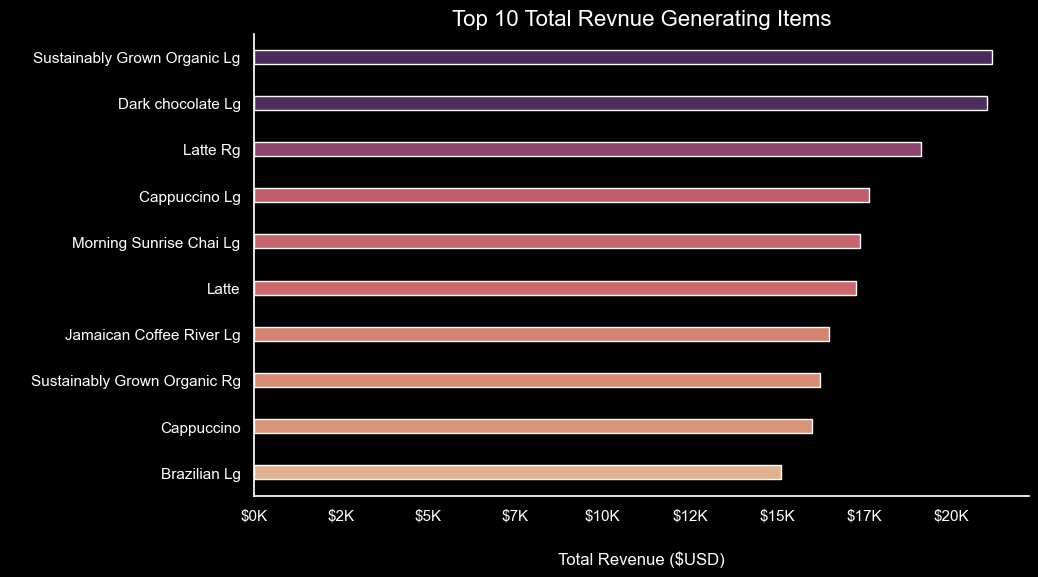

In [151]:
# plotting top 10 products that drive revenue 

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= items_total_revenue_top_10, x='revenue', y='product_detail', hue='revenue', palette='flare', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')


plt.title('Top 10 Total Revnue Generating Items', fontsize= 16, color='white')
plt.xlabel('Total Revenue ($USD)', fontsize=12, color='white', labelpad=20)
plt.ylabel(' ')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()


# stores and locations: 

In [131]:
# checking the distribution of transactions across the different store locations
df['store_location'].value_counts()

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

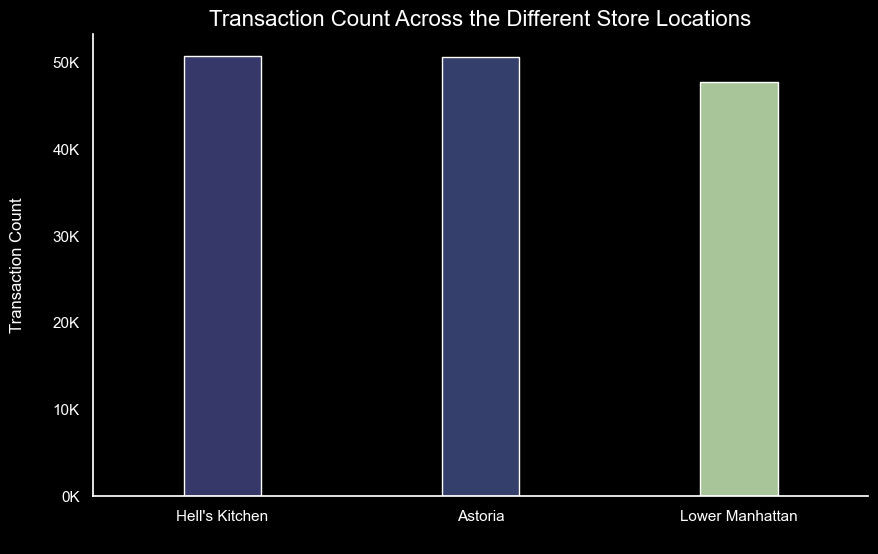

In [132]:
stores_trans_count_plot = df['store_location'].value_counts().reset_index()

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= stores_trans_count_plot, x='store_location', y='count', hue='count', palette='crest', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K'))

plt.title('Transaction Count Across the Different Store Locations', fontsize= 16, color='white')
plt.ylabel('Transaction Count', fontsize=12, color='white', labelpad=20)
plt.xlabel(' ')

plt.show()


In [133]:
# checking the revnue difference across the different stores: 
df.groupby('store_location')['revenue'].sum()

store_location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: revenue, dtype: float64

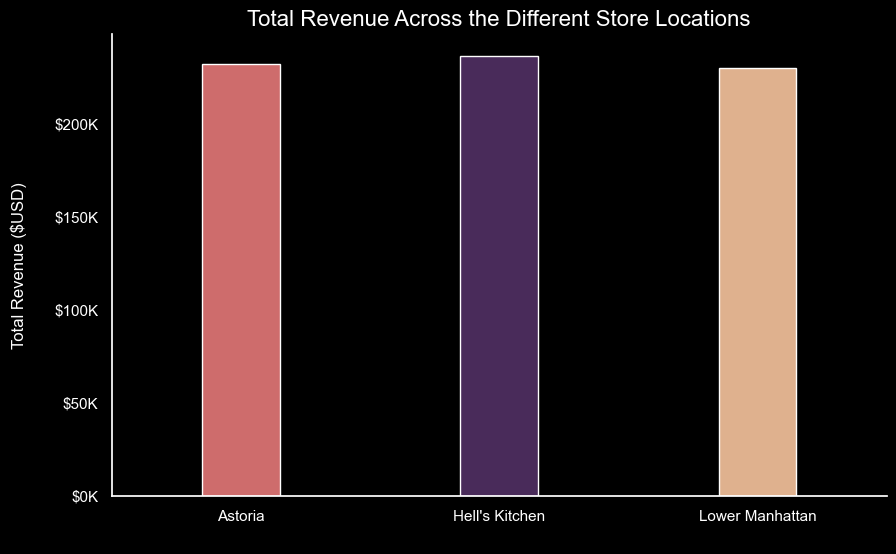

In [134]:
stores_revenue_plot = df.groupby('store_location')['revenue'].sum().reset_index() 

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= stores_revenue_plot, x='store_location', y='revenue', hue='revenue', palette='flare', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 

plt.title('Total Revenue Across the Different Store Locations', fontsize= 16, color='white')
plt.ylabel('Total Revenue ($USD)', fontsize=12, color='white', labelpad=20)
plt.xlabel(' ')

plt.show()

## exporting the final df :

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   transaction_id     149116 non-null  int64         
 1   transaction_date   149116 non-null  datetime64[ns]
 2   transaction_time   149116 non-null  object        
 3   transaction_qty    149116 non-null  int64         
 4   store_id           149116 non-null  int64         
 5   store_location     149116 non-null  object        
 6   product_id         149116 non-null  int64         
 7   unit_price         149116 non-null  float64       
 8   product_category   149116 non-null  object        
 9   product_type       149116 non-null  object        
 10  product_detail     149116 non-null  object        
 11  revenue            149116 non-null  float64       
 12  time_range         149116 non-null  object        
 13  transaction_month  149116 non-null  object  

In [136]:
file_name = 'modified_coffee_shop_sales.csv'
save_path = r'D:\This PC\Documents\Data_Analysis\HUJI_course\projects_and_datasets\final_project\coffee_shop_sales_data' 

full_path = os.path.join(save_path, file_name)

df.to_csv(full_path, index=False, encoding='utf-8')


# verifying if it worked 
print(f"exported successfully to: {full_path}")
print(f"approximate file size: {os.path.getsize(full_path) / (1024 * 1024):.1f} MB")

exported successfully to: D:\This PC\Documents\Data_Analysis\HUJI_course\projects_and_datasets\final_project\coffee_shop_sales_data\modified_coffee_shop_sales.csv
approximate file size: 17.5 MB
